### Importing Necessary Libraries

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

### Downloading NLTK Data Packages

In [27]:
import re
import nltk
from nltk import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to C:\Users\Maira
[nltk_data]     Naveed\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Maira
[nltk_data]     Naveed\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Loading Datasets 

In [28]:
validation = pd.read_csv("twitter_validation.csv", header = None)
train = pd.read_csv("twitter_training.csv", header = None)

#### Previewing the Training Dataset

In [31]:
train.head()
#display the first 5 rows of the dataset by default.

,0,1,2,3
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


#### Renaming Columns for Training Data

In [34]:
train.columns=['id', 'information', 'type', 'text']

#### Renaming Columns for Validation Data

In [36]:
validation.columns = ['id', 'information', 'type', 'text']

### Previewing the Validation Dataset

In [37]:
validation.head()

,id,information,type,text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


### Assigning DataFrames to New Variables

In [38]:
#Assigning Training DataFrame
train_df = train

In [39]:
#Assigning Validation DataFrame
val_df = validation

### Text Preprocessing: Lowercasing and Cleaning

In [40]:
train_df["lower"]=train_df.text.str.lower()
train_df["lower"]=[str(data) for data in train_df.lower]
train_df["lower"]=train_df.lower.apply(lambda x: re.sub('[^[A-Za-z0-9]+','',x))

### Text Preprocessing for Validation Data

In [41]:
val_df["lower"]=val_df.text.str.lower()
val_df["lower"]=[str(data) for data in val_df.lower]
val_df["lower"]=val_df.lower.apply(lambda x: re.sub('[^A-Za-z0-9 ]+','',x))

### Previewing the Training Dataset

In [43]:
train_df.head()

,id,information,type,text,lower
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,imgettingonborderlandsandiwillmurderyouall
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,iamcomingtothebordersandiwillkillyouall
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,imgettingonborderlandsandiwillkillyouall
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,imcomingonborderlandsandiwillmurderyouall
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,imgettingonborderlands2andiwillmurderyoumeall


### Visualizing the Distribution of Tweets

Text(0.5, 1.0, 'Distribution of tweets per Branch and Type')

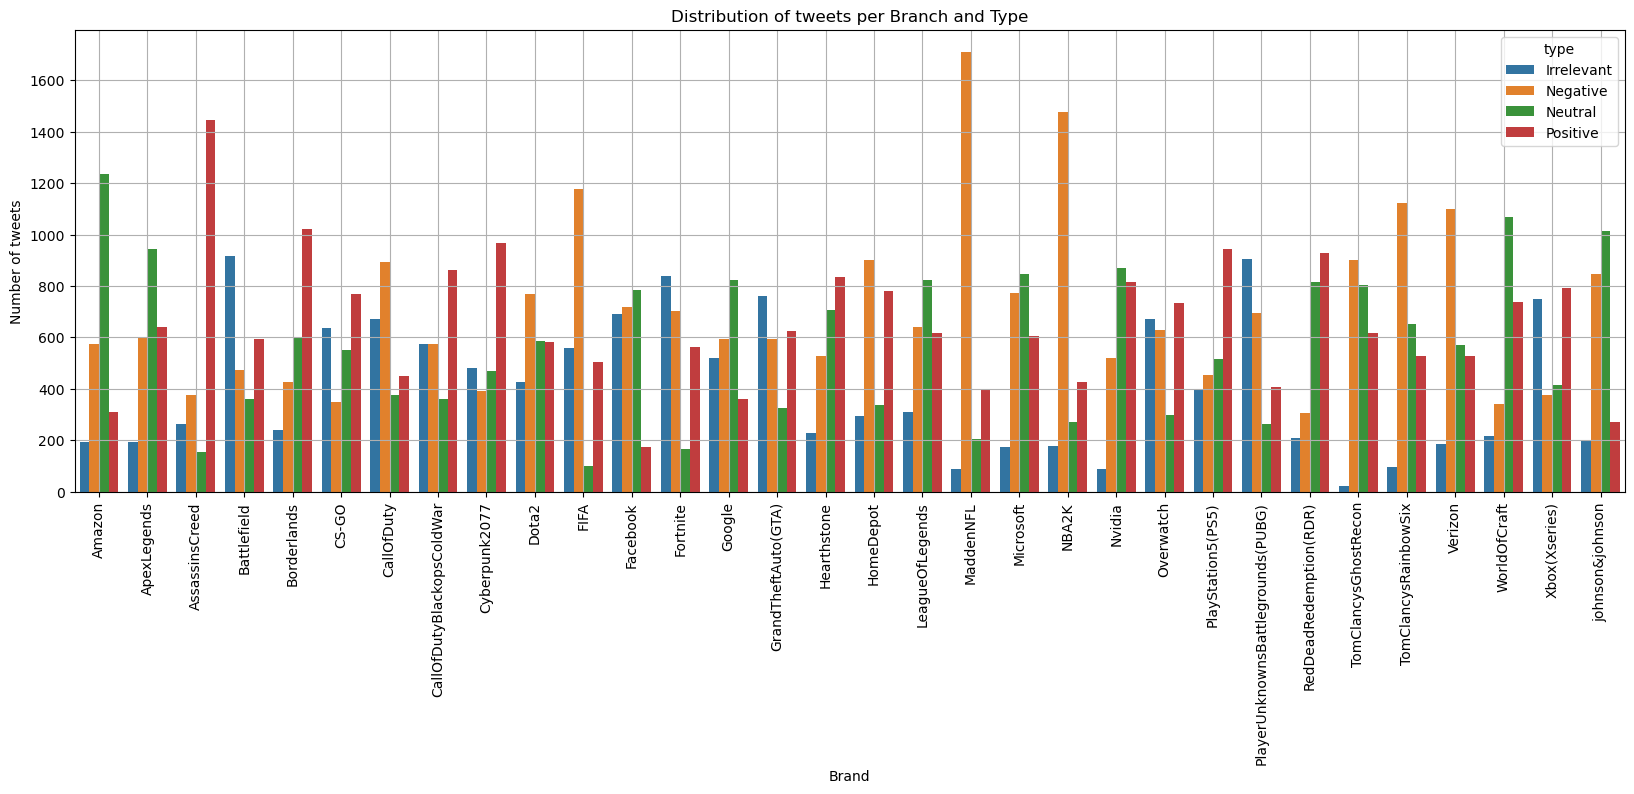

In [44]:
info_type=train.groupby(by=["information","type"]).count().reset_index()
plt.figure(figsize=(20,6))
sns.barplot(data=info_type,x="information", y="id", hue="type")
plt.xticks(rotation=90)
plt.xlabel("Brand")
plt.ylabel("Number of tweets")
plt.grid()
plt.title("Distribution of tweets per Branch and Type")

### Tokenizing Text Data

In [45]:
tokens_text = [word_tokenize(str(word)) for word in train_df.lower]

In [46]:
tokens_text

[['imgettingonborderlandsandiwillmurderyouall'],
 ['iamcomingtothebordersandiwillkillyouall'],
 ['imgettingonborderlandsandiwillkillyouall'],
 ['imcomingonborderlandsandiwillmurderyouall'],
 ['imgettingonborderlands2andiwillmurderyoumeall'],
 ['imgettingintoborderlandsandicanmurderyouall'],
 ['soispentafewhoursmakingsomethingforfunifyoudontknowiamahugeborderlandsfanandmayaisoneofmyfavoritecharacterssoidecidedtomakemyselfawallpaperformypchereistheoriginalimageversusthecreationimadeenjoypictwittercommlsi5wf9jg'],
 ['soispentacoupleofhoursdoingsomethingforfunifyoudontknowthatimahugeborderlandsfanandmayaisoneofmyfavoritecharactersidecidedtomakeawallpaperformypcherestheoriginalpicturecomparedtothecreationimadehavefunpictwittercommlsi5wf9jg'],
 ['soispentafewhoursdoingsomethingforfunifyoudontknowimahugeborderlandsfanandmayaisoneofmyfavoritecharacters'],
 ['soispentafewhoursmakingsomethingforfunifyoudontknowiamahugerhandlerrfanandmayaisoneofmyfavoritecharacterssoidecidedtomakemyselfawallpaper

### Loading and Displaying Stop Words

In [48]:
stopwords_nltk = nltk.corpus.stopwords
stop_words = stopwords_nltk.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

### Initializing the Bag-of-Words Vectorizer

In [15]:
bow_counts = CountVectorizer (tokenizer=word_tokenize, stop_words=stop_words, ngram_range=(1, 1))

In [49]:
bow_counts

CountVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                tokenizer=<function word_tokenize at 0x0000026CACB422A0>)

### Splitting the Dataset into Training and Test Sets

In [50]:
reviews_train, reviews_test = train_test_split(train_df, test_size=0.2, random_state=42)

### Transforming Text Data into Bag-of-Words Representation

In [51]:
X_train_bow = bow_counts.fit_transform(reviews_train. lower)
X_test_bow = bow_counts.transform(reviews_test.lower)

C:\Users\Maira Naveed\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


### Extracting Target Labels for Training and Test Sets

In [52]:
y_train_bow = reviews_train['type']
y_test_bow = reviews_test['type']

In [53]:
y_test_bow

34877    Irrelevant
21704      Positive
47008      Negative
7969     Irrelevant
454        Positive
            ...    
52360    Irrelevant
57296      Positive
35884      Positive
59060      Negative
4740        Neutral
Name: type, Length: 14937, dtype: object

### Training a Logistic Regression Model and Evaluating Performance

In [54]:
Logistic_reg = LogisticRegression (C=1, solver="liblinear", max_iter=200)
Logistic_reg.fit(X_train_bow, y_train_bow)

test_pred = Logistic_reg.predict(X_test_bow)
print("Accuracy: ", accuracy_score (y_test_bow, test_pred))

Accuracy:  0.3895695253397603


### Transforming Validation Data and Extracting Target Labels

In [56]:
X_val_bow = bow_counts.transform(val_df.lower)
y_val_bow = val_df['type']

In [57]:
y_val_bow

0      Irrelevant
1         Neutral
2        Negative
3        Negative
4         Neutral
          ...    
995    Irrelevant
996    Irrelevant
997      Positive
998      Positive
999       Neutral
Name: type, Length: 1000, dtype: object

### Evaluating Model Performance on the Validation Set

In [60]:
Val_res = Logistic_reg.predict(X_val_bow)
print("Accuracy: ", accuracy_score (y_val_bow, Val_res))

Accuracy:  0.357
